In [5]:
import os
import cv2
import requests
import matplotlib.pyplot as plt
import numpy as np
import json

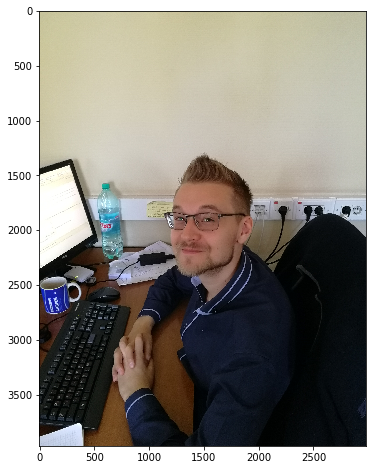

In [6]:
photo_path = '/home/BANK/vtb21215/face_recog/test_photos'
photo_files = os.listdir(photo_path)
img = photo_path + '/' + photo_files[17]
img = cv2.imread(img)
plt.figure(figsize=(16, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
%%time
url_server = 'https://10.64.24.253:8000/services/dashboard-4-9'
#url_server = 'http://127.0.0.1:21009/services/dashboard-4-9'
content_type = 'image/png'
headers = {'content-type': content_type}
_, data_send = cv2.imencode('.png', img)
r = requests.post(url_server, data=data_send.tostring(), headers=headers, verify=False)
print(r)

/opt/cloudera/parcels/Anaconda-5.3.1-dsai1.6/envs/python3.6.6/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Response [200]>
CPU times: user 821 ms, sys: 34.1 ms, total: 855 ms
Wall time: 14.7 s


/opt/cloudera/parcels/Anaconda-5.3.1-dsai1.6/envs/python3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


got image:  (3968, 2976, 3)


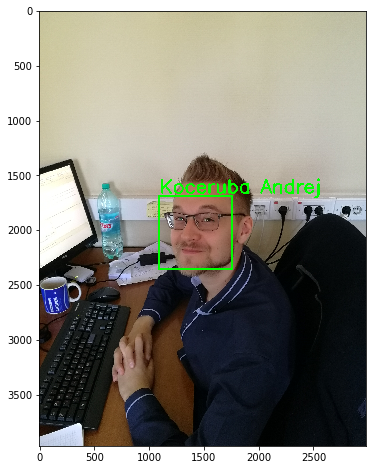

In [8]:
img_array = np.fromstring(r.content, dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
print('got image: ', img.shape)
plt.figure(figsize=(16, 8))
plt.imshow(img)
plt.show()